In [14]:
"""Importacion de librerias esenciales para
realizar el algoritmo de Arbol de Desicion"""

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [18]:
"""Importar el Dataset por medio de la libreria pandas"""
dataset = pd.read_csv('decisionTree_Data.csv')
dataset.head()

,Age,Salary,Purchased
0,19,19000,0
1,35,20000,0
2,26,43000,0
3,27,57000,0
4,19,76000,0


In [6]:
"""Proceso de division del Dataset, en datos de entrada y salida"""
X = dataset.iloc[:, [0,1]].values
y = dataset.iloc[:, 2].values
"""Colocamos un 25% para prueba, el otro 75% 
para el entrenamiento y un random de 0"""
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=0)

In [7]:
"""Declaracion del método de escalado estándar de sklearn"""
sc = StandardScaler()

"""Proporcionar los valores de entrada para el método escalar"""
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [9]:
"""Declaracion del metodo entropy 
(significa ganancia de información)"""

classifer = DecisionTreeClassifier(criterion='entropy', random_state=0)

"""Construccion del Fit para el entrenamiento de los datos """
classifer.fit(X_train,y_train)
y_pred = classifer.predict(X_test)

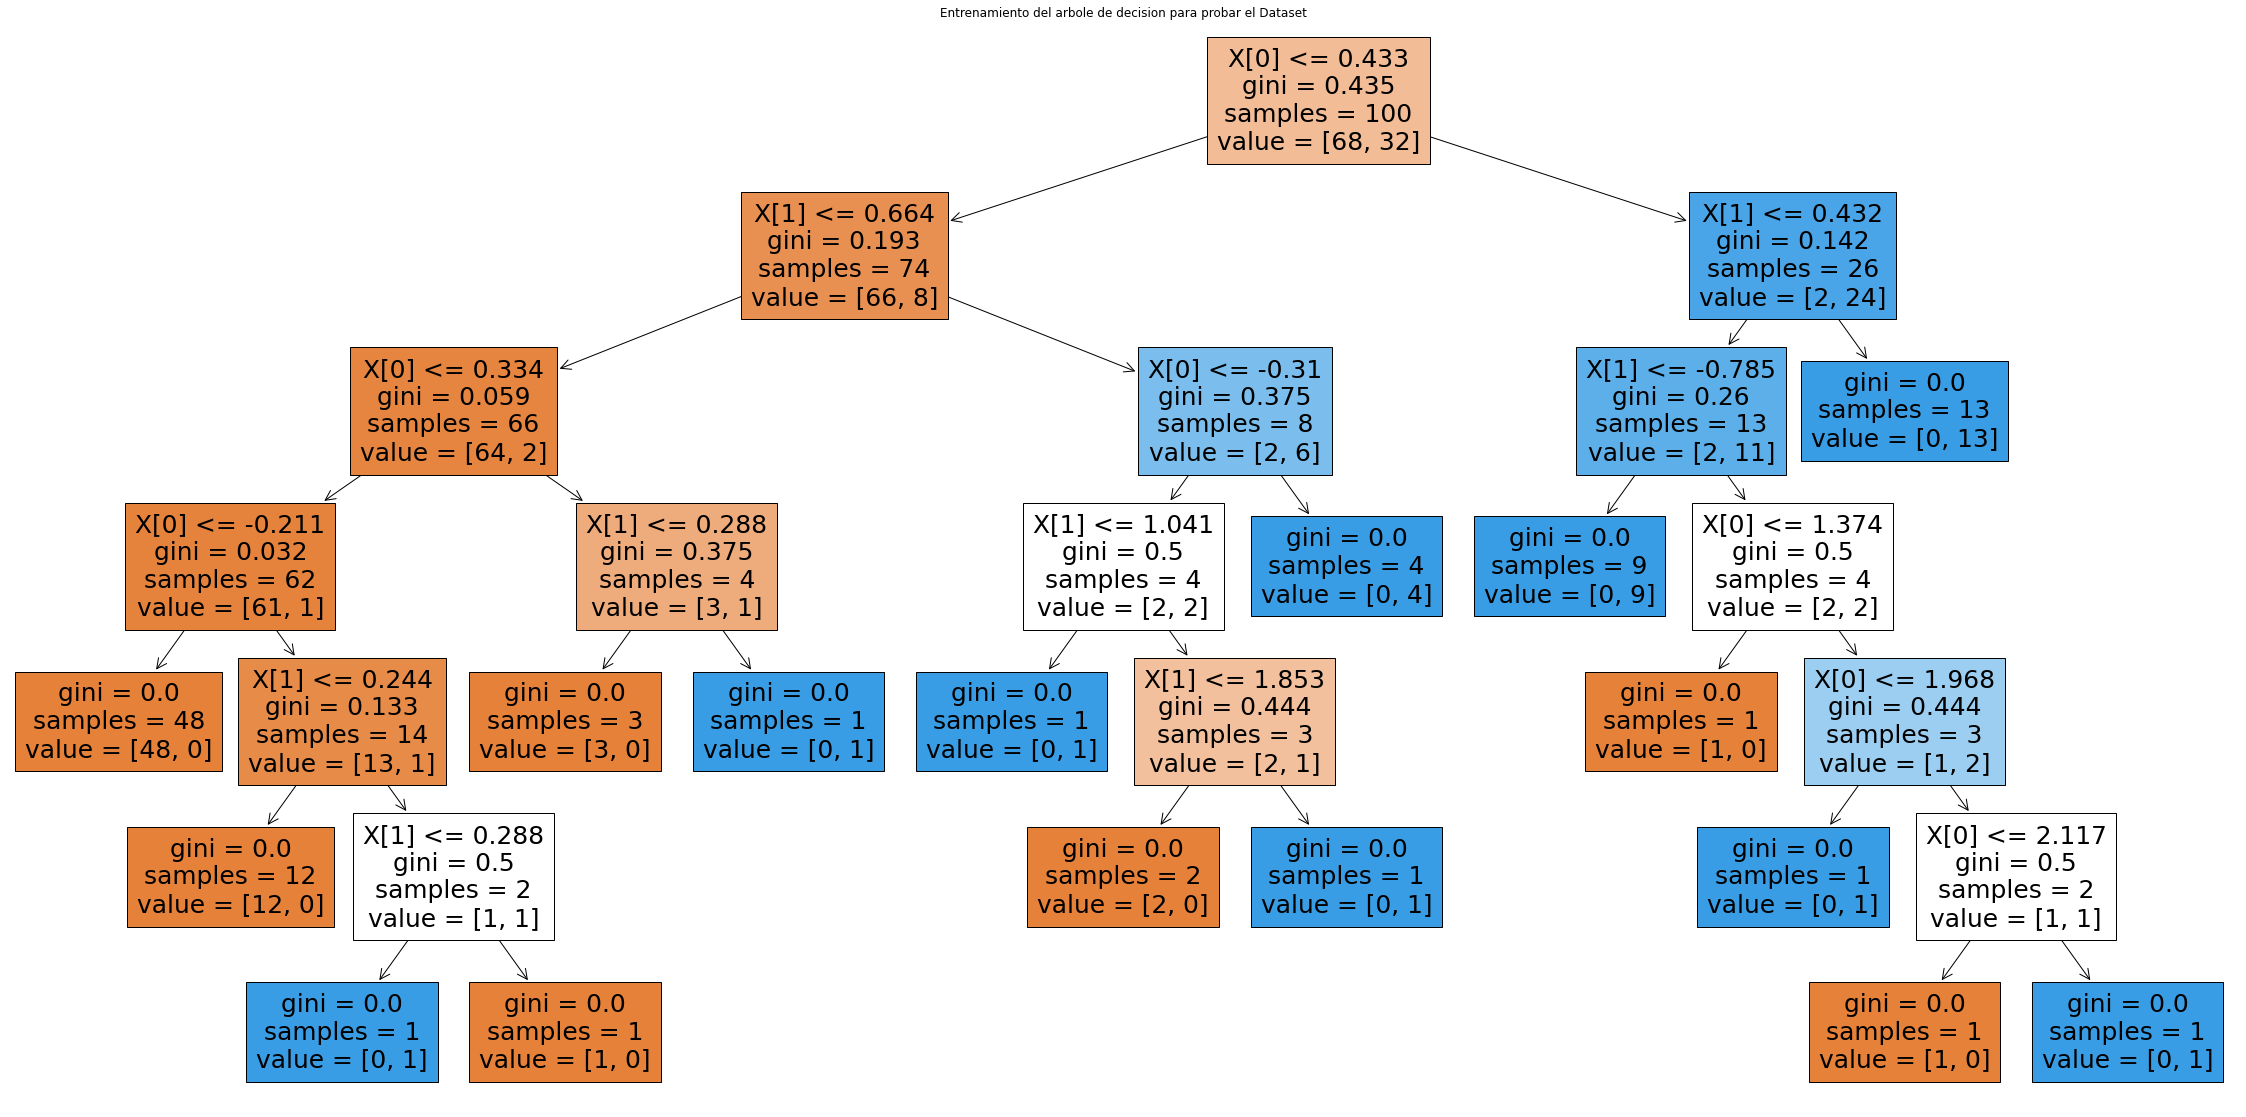

In [11]:
""" Importar y declarar el metodo DecisionTreeClassifier"""
clf = DecisionTreeClassifier()

"""Tamaño de salida del árbol de decisión""" 
plt.figure(figsize=(40,20))

"""Proporcionar el dataset para el entrenamiento"""
clf = clf.fit(X_test, y_test)
plot_tree(clf, filled=True)
plt.title("Entrenamiento del arbole de decision para probar el Dataset")
plt.show()

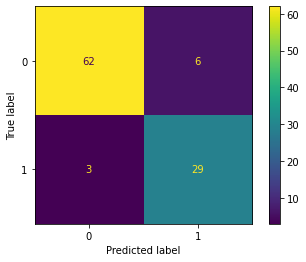

In [12]:
"""Generar la matriz de confusion"""
cm = confusion_matrix(y_test,y_pred, labels=classifer.classes_)

"""Trazado de etiquetas"""
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=classifer.classes_)
disp.plot()

"""Visualizacion de la matriz de confusion"""
plt.show()

In [15]:
"""Visualizacion del modelo mediante el método (classification_report)"""
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.91      0.93        68
           1       0.83      0.91      0.87        32

    accuracy                           0.91       100
   macro avg       0.89      0.91      0.90       100
weighted avg       0.91      0.91      0.91       100



In [17]:
"""Interpretacion de los valores de forma matematica"""
"""Definir una funcion para calcular los valores de la matriz de confusion"""
def confusion_values(y_actual, y_pred):

    """Inicializar los valores con valor cero"""
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    """Iterar a través de los valores"""
    for i in range(len(y_pred)): 
        if y_actual[i]==y_pred[i]==1:
           TP += 1
        if y_pred[i]==1 and y_actual[i]!=y_pred[i]:
           FP += 1
        if y_actual[i]==y_pred[i]==0:
           TN += 1
        if y_pred[i]==0 and y_actual[i]!=y_pred[i]:
           FN += 1

    """Imprimir los valores"""
    print("True Positive: ", TP)
    print("False Positive:", FP)
    print("True Negative: ", TN)
    print("False Negative: ", FN)

""" Llamada de la fusion"""
confusion_values(y_test, y_pred)

True Positive:  29
False Positive: 6
True Negative:  62
False Negative:  3
